In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati
sns.set()

In [2]:
df =pd.read_csv("data/clicks.csv.gzip", compression='gzip')
df.dtypes

advertiser_id        int64
action_id          float64
source_id            int64
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [3]:
df['trans_id'].value_counts()

NuqpGWJrRhlsGTAQZor2DKpBnlB2i2o    1
QDoUB9Nog6vHMTSW5W2au-85IVeU1Lg    1
UCb0aZN39UExNqZ6i6_sBS894CyIBVM    1
d2SiGClZWVy6ZhSi3umPoSjSN0yjRbM    1
N4qw-onIl0fBUhDH5IXkaXLm0K_eknc    1
Vf64o0zNd87nkLAonAESPLbx44_P8vg    1
wwlSM3zD3S3m_01BNaIbEESykpqvgtI    1
5ZPZSeHdC4U887LgEKmb6QV3Z_7uPN4    1
zHMXG7yC6EirRSP_dqfHecrw7akC5-U    1
wgzniX_5OauasAq5Ral7_g_ryGMIslg    1
Uq8up2Be_DCnzY0TQ2tQtOX3dl_h3vk    1
AxMkzN-Ow-yzGjS53YKMOGyQ4W2WwNY    1
DOvHxR_sJGfQdCnW93NY2WXO05AQsP4    1
tyu4pxuU_y4y7UN4kpPO4vD5wGLFKy4    1
Zzt7CRTQVR5_cO0yLA6xkl7qXuq5gqA    1
U9KinkENlfpIQ_uqxwxNJjd88Ot5zCU    1
ICYlKjUemT_l6Ba67S2TktgbdxetkFI    1
VUZGT9W5K7WGCHB2TRnOWORvslF4gQM    1
XntrvHRr6TIBnWDXjDCFmSO987mPMd4    1
BfSNM2OD7TbfgiJzXvuD5yJ_yxafX6E    1
7laxe_sK0BFi3odAqSaQEYfllOrpLw4    1
zkOFpc1FMxX17W85CnB9Ho1F2IndBrE    1
0Avvhs8TvZsAcMospQiTY06pEZZJtbY    1
BpVUD1ol3QBc-1LdJ2BApgH9ma-8fmg    1
wnpYXxoWsfwTJHjmSusUNIyAhUQ9rUo    1
afx9nS63bg0TYoVnU6tUHbypf-7ngQ0    1
mcdXYfBMTH1oZV-iKjWDaTFwHFOnMT0    1
l

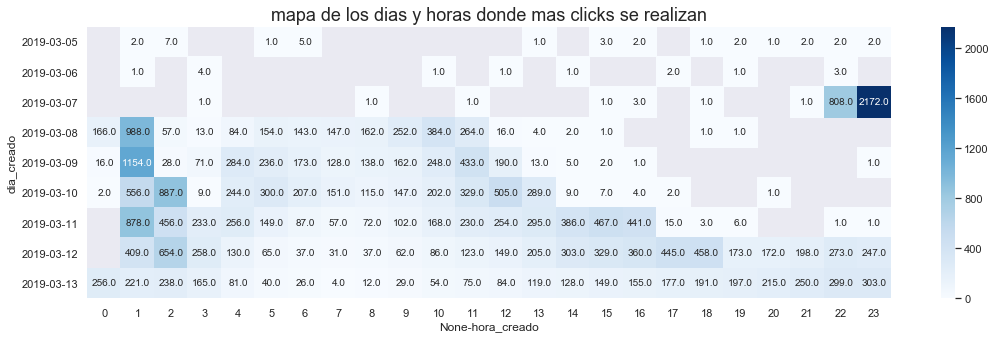

In [4]:

df['created'] = pd.to_datetime(df['created'])

df['hora_creado']=df['created'].dt.hour
df['dia_creado']=df['created'].dt.date
df['ocurrencias']=1
tabla=df[['dia_creado', 'hora_creado','ocurrencias']].groupby(['dia_creado','hora_creado']).count()
matriz = tabla.unstack()

#plt.pcolor(m,yticklabels=True,xticklabels=True, cmap='Reds')
fig, ax =mplt.subplots(figsize=(18,5))
title="mapa de los dias y horas donde mas clicks se realizan"
mplt.title(title,fontsize=18)
tit=ax.title
ax.set_xticks([])
ax.set_yticks([])
etiquetaX=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#etiquetaY=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
sns.heatmap(matriz,xticklabels=etiquetaX,fmt="", cmap='Blues',ax=ax, annot=True);


3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

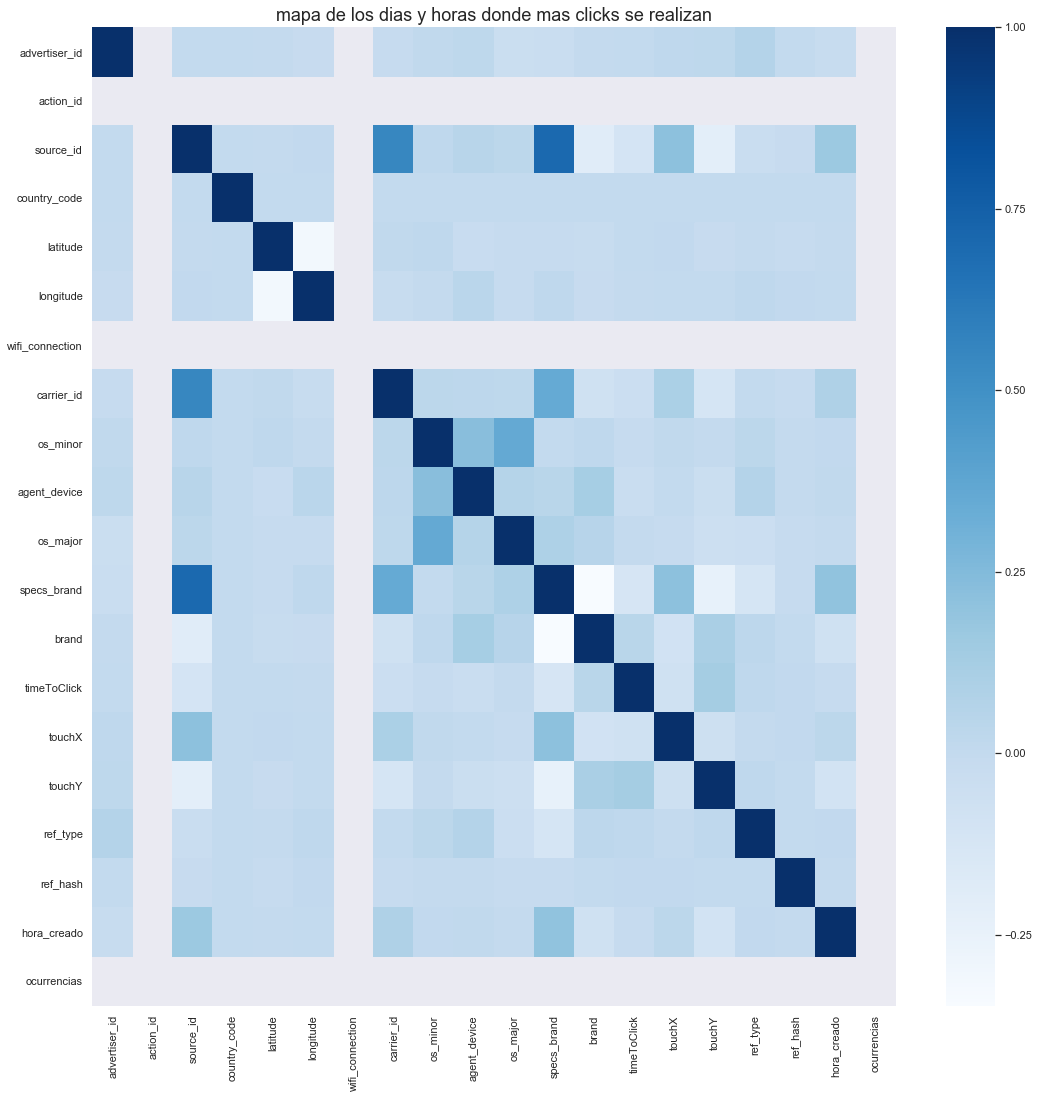

In [5]:
corr=df.corr()

fig, ax =mplt.subplots(figsize=(18,18))
title="mapa de los dias y horas donde mas clicks se realizan"
mplt.title(title,fontsize=18)
tit=ax.title
ax.set_xticks([])
ax.set_yticks([])


sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap='Blues',ax=ax );
df['advertiser_id'].value_counts()

(737122.9, 737131.1)

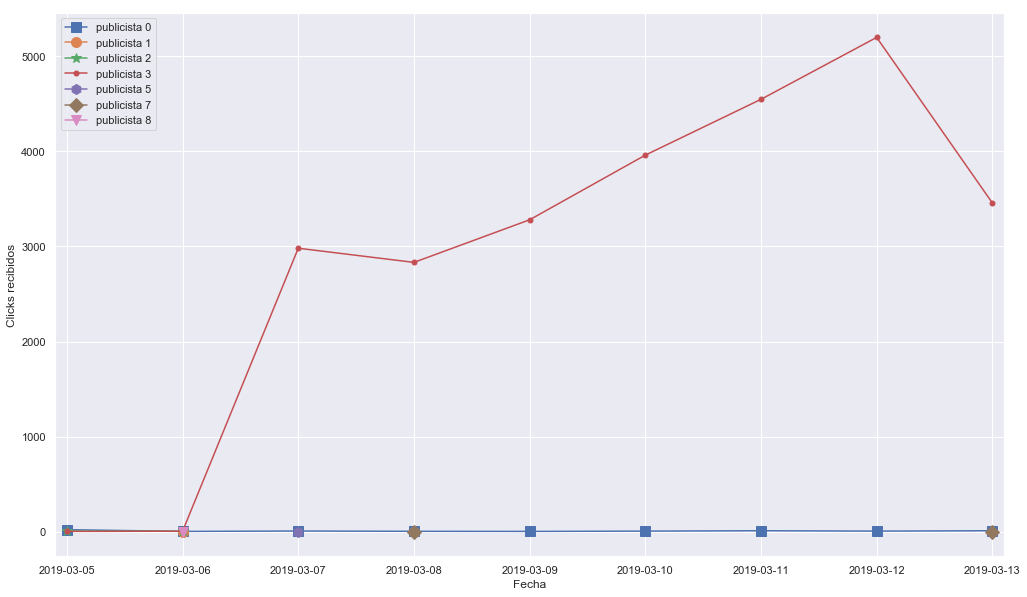

In [6]:

df['dia_creado']=df['created'].dt.date
tabla=df[['dia_creado','ocurrencias','advertiser_id']].groupby(['dia_creado','advertiser_id']).count()
tabla = tabla.unstack()

grafico=tabla.plot(figsize=(17, 10),ms=10.0, label='el maestruli se reiria')
# create valid markers from mpl.markers
#valid_markers = ([item[0] for item in plt.markers.MarkerStyle.markers.items() if item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])
 

#disenio del grafico.
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('.')
linea_graficos[4].set_marker('h')
linea_graficos[5].set_marker('D')
linea_graficos[6].set_marker('v')
L=mplt.legend()
mplt.ylabel('Clicks recibidos')
mplt.xlabel('Fecha')
L.get_texts()[0].set_text('publicista 0')
L.get_texts()[1].set_text('publicista 1')
L.get_texts()[2].set_text('publicista 2')
L.get_texts()[3].set_text('publicista 3')
L.get_texts()[4].set_text('publicista 5')
L.get_texts()[5].set_text('publicista 7')
L.get_texts()[6].set_text('publicista 8')
left, right =grafico.get_xlim();
grafico.set_xlim(left-0.1,right+0.1)

(737122.9, 737131.1)

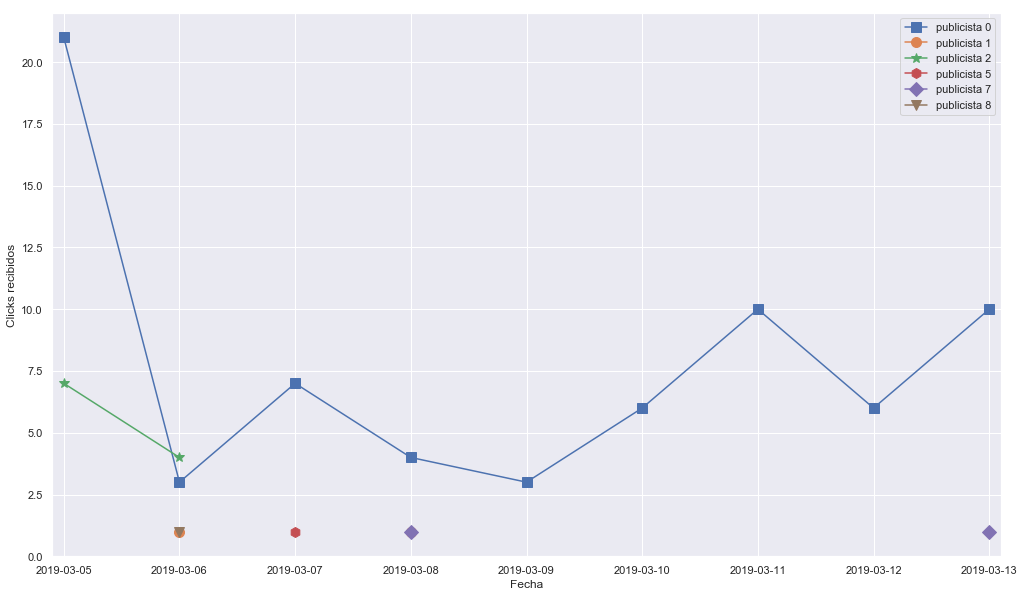

In [8]:
clicks_acotados=df[df['advertiser_id']!=3]
tabla=clicks_acotados[['dia_creado','ocurrencias','advertiser_id']].groupby(['dia_creado','advertiser_id']).count()
tabla = tabla.unstack()

grafico=tabla.plot(figsize=(17, 10),ms=10.0)

#cambiar estetica del grafico
linea_graficos=grafico.get_lines()
linea_graficos[0].set_marker('s')
linea_graficos[1].set_marker('o')
linea_graficos[2].set_marker('*')
linea_graficos[3].set_marker('h')
linea_graficos[4].set_marker('D')
linea_graficos[5].set_marker('v')   
    
    
L=mplt.legend()    
L.get_texts()[0].set_text('publicista 0')
L.get_texts()[1].set_text('publicista 1')
L.get_texts()[2].set_text('publicista 2')
L.get_texts()[3].set_text('publicista 5')
L.get_texts()[4].set_text('publicista 7')
L.get_texts()[5].set_text('publicista 8')

mplt.ylabel('Clicks recibidos')
mplt.xlabel('Fecha')
left, right =grafico.get_xlim()
grafico.set_xlim(left-0.1,right+0.1)